# 0.0 Understand the Problem

-- Objetivo do problema:
    -- 1.0 Previsão do primeiro destino que um novo usuário irá escolher.
        
    -- Porque?
        -- Qual tipo de modelo de negócio do Airbnb?
            -- Marketplace (Conecta pessoas que oferecem acomodação, com pessoas que estão procurando acomodação)
            -- Oferta (pessoas oferecendo acomodação)
                -- Tamanho do Potfólio
                -- Diversidade/Densidade do Potfólio
                -- Preço Médio do aluguel
                                
            -- Demanda ( pessoas procurando acomodação)
                -- Número de usuários
                -- LTV (Lifetime Value)
                -- CAC (Client Acquisition Cost)
                
                
                Gross Revenue = (Fee*Número de Cliente) - CAC
        
-- Proposta da Solução <br>

    -- Modelo de Previsão do primeiro destino de um novo usuário
    -- 1.0 Predições e salvar em uma tabela do banco de dados
    -- 2.0 API
        -- Input: usuário e suas caracteristicas
        -- Output: usuario e suas caracteristicas com a **predição de destino**
        
    -- 16 ciclos

# <font color='red'> Ciclo01: End to End </font>

## 0.0 Imports

In [71]:
import pandas                           as pd

from sklearn     import model_selection as ms
from sklearn     import preprocessing   as pp
from sklearn     import metrics         as m

from keras       import models          as ml
from keras       import layers          as l

from scikitplot  import metrics         as mt

### 0.1 Helper Functions

### 0.2 Loading Data

In [13]:
df_raw = pd.read_csv( 'data/train_users_2.csv', low_memory=True )
df_raw.shape

(213451, 16)

In [8]:
#df_sessions = pd.read_csv( 'data/sessions.csv', low_memory=True )
#df_sessions.shape

(10567737, 6)

## 1.0 Data Description

In [14]:
df1 = df_raw.copy()

In [15]:
print( 'Number of rows: {}'.format( df1.shape[0]) )
print( 'Number of columns: {}'.format( df1.shape[1]) )

Number of rows: 213451
Number of columns: 16


### 1.1 Data Type

In [16]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [20]:
df1.sample().T

,201376
id,nhtdwqcns8
date_account_created,2014-06-08
timestamp_first_active,20140608153003
date_first_booking,NaN
gender,MALE
age,32
signup_method,basic
signup_flow,0
language,en
affiliate_channel,direct


### 1.2 NA Check

In [21]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [23]:
# remoe missing values completly
df1 = df1.dropna()
df1.shape

(68171, 16)

In [24]:
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

### 1.3 Change Type

In [25]:
# date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S' )

# date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# age
df1['age'] = df1['age'].astype( int )

In [26]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int32
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

### 1.4 Check Balanced Data

In [27]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

## 2.0 Data Filtering

In [29]:
df2 = df1.copy()

### 2.1 Filtering Rows

### 2.2 Column Selection

## 3.0 Data Preparation

In [30]:
df3 = df2.copy()

In [59]:
# dummy variable
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df3 = pd.concat( [df3[['id', 'country_destination']], df3_dummy], axis=1 )

## 4.0 Feature Selection

In [60]:
cols_drop = [ 'date_account_created', 'timestamp_first_active', 'date_first_booking' ] #original date
df4 = df3.drop( cols_drop, axis=1 )

In [61]:
df4.sample().T

,15539
id,mp2c1vmm9t
country_destination,US
age,33
signup_flow,2
gender_-unknown-,0
...,...
first_browser_Sogou Explorer,0
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0


In [62]:
X = df4.drop( 'country_destination', axis=1 )
y = df4['country_destination'].copy()

## 5.0 Machine Learning Model - Neural Network - Multi-Layer Perceptron

In [63]:
# Split dataset into training and test

In [64]:
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

In [65]:
x_train = X_train.drop( 'id', axis=1 )
x_test = X_test.drop( 'id', axis=1 )

In [72]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [73]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [75]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim=x_train.shape[1], activation='relu') )
model.add( l.Dense( 11, activation='softmax') )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 1s 726us/step - loss: 1.2985 - accuracy: 0.7040
Epoch 2/100
1705/1705 [==============================] - 1s 802us/step - loss: 1.2245 - accuracy: 0.7082
Epoch 3/100
1705/1705 [==============================] - 1s 587us/step - loss: 1.2093 - accuracy: 0.7085
Epoch 4/100
1705/1705 [==============================] - 1s 647us/step - loss: 1.1901 - accuracy: 0.7086
Epoch 5/100
1705/1705 [==============================] - 1s 632us/step - loss: 1.1769 - accuracy: 0.7086
Epoch 6/100
1705/1705 [==============================] - 1s 619us/step - loss: 1.1612 - accuracy: 0.7087
Epoch 7/100
1705/1705 [==============================] - 1s 636us/step - loss: 1.1561 - accuracy: 0.7085
Epoch 8/100
1705/1705 [==============================] - 1s 630us/step - loss: 1.1443 - accuracy: 0.7088
Epoch 9/100
1705/1705 [==============================] - 1s 620us/step - loss: 1.1424 - accuracy: 0.7087
Epoch 10/100
1705/1705 [==============================]

1705/1705 [==============================] - 1s 637us/step - loss: 1.1006 - accuracy: 0.7115
Epoch 79/100
1705/1705 [==============================] - 1s 672us/step - loss: 1.1009 - accuracy: 0.7114
Epoch 80/100
1705/1705 [==============================] - 1s 687us/step - loss: 1.1005 - accuracy: 0.7114
Epoch 81/100
1705/1705 [==============================] - 1s 662us/step - loss: 1.1001 - accuracy: 0.7115
Epoch 82/100
1705/1705 [==============================] - 1s 654us/step - loss: 1.0996 - accuracy: 0.7113
Epoch 83/100
1705/1705 [==============================] - 1s 655us/step - loss: 1.0999 - accuracy: 0.7114
Epoch 84/100
1705/1705 [==============================] - 1s 646us/step - loss: 1.0996 - accuracy: 0.7115
Epoch 85/100
1705/1705 [==============================] - 1s 667us/step - loss: 1.0993 - accuracy: 0.7117
Epoch 86/100
1705/1705 [==============================] - 1s 663us/step - loss: 1.0991 - accuracy: 0.7116
Epoch 87/100
1705/1705 [==============================] - 1

## 6.0 NN Performance

In [76]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape( 1, -1 )[0]

Accuracy: 0.7035570223689036


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

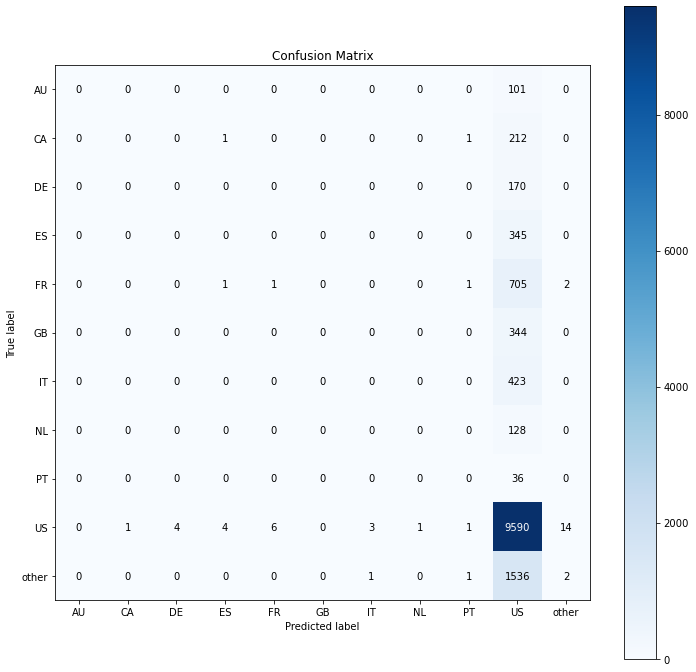

In [78]:
# Accuracy
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print( 'Accuracy: {}'.format( acc_nn ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12, 12) )

# Balanced Accuracy
# F-Score BAlanced
# Recall-Precision
# ROC
# Kappa Metrics
# Matthew Metrics